In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Elenco delle variabili e delle costanti

#velocità della luce c
c = 3 * 10**8
#carica dell'elettrone in Coulomb
q = 1.6 * 10**(-19)
#massa ioni H2 in eV
m_ioni = 1876 * 10**6
#massa elettroni in eV
m_elettroni = 511 * 10**3
#temperatura del plasma in eV
t_e = 5
#densita del plasma (particelle/cm^3)
n_e = 10**10

#Guaina di Debye
lambda_D = 0
#espansione della guaina
x_g = 0

#Range delle posizioni, campi e raggi in cui sondiamo
x_min = 0
x_max = 0
x_flesso = 0
B_min = 0
B_max = 0
B_flesso = 0
r_e_min = 0
r_e_max = 0
r_e_flesso = 0

#Correnti di satuazioni
j_sat_i = 0
j_sat_el = 0

#potenziale di sonda max
V_probe_max = 10
#Lunghezza sonda (mm)
H_sonda = 7
#Diametro sonda (m)
diam = 1.5*10**-3

# Logbook 01-04-2016

## Elenco attività
 ### Calcolo della $\lambda_D$
 Per stimare la guaina di Debye abbiamo utilizzato la formula
 $$
      \lambda_D = \sqrt{\frac{k T_e}{4 \pi n_e e^2}} =  7.42\;10^2 \sqrt{\frac{T_e[eV]}{n_e[cm^{-3}]}}
 $$
 Con:
 $$
     T_e = 5eV \qquad n_e = 10^{16}m^{-3} = 10^{10}cm^{-3}
 $$
 
 Chiamiamo `t_e` la temperatura elettronica e `n_e` la densità elettronica.
  
  Il suo valore è $0.166mm$

In [4]:
lambda_D = 7.42*10**2 * sqrt(t_e/(n_e))
print("Guaina di Debye: {0} cm".format(round(lambda_D,4)))

Guaina di Debye: 0.0166 cm


## Profilo assiale del campo magnetico

Profilo dell'asse magnetico lungo la macchina lineare. Il quarto max coincide con la sesta bobina.

<IPython.core.display.Javascript object>


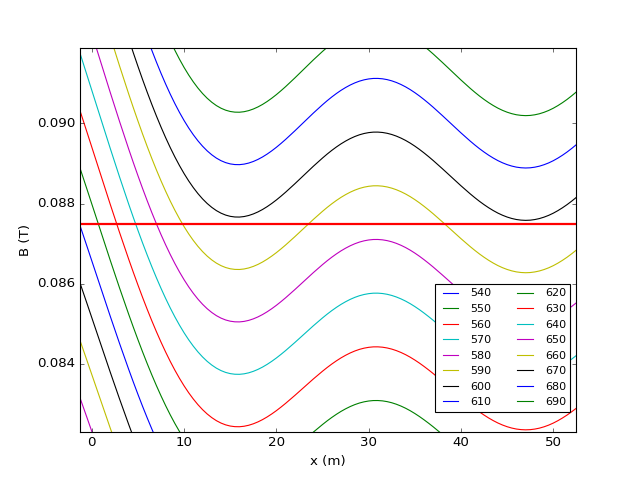

In [80]:
import matplotlib.pyplot as plt

f = open('B_z_1000A.txt','r')

x = []
y = []

for l in f:
    l = l.strip()
    d = l.split('      ')
    x.append(float(d[0]))
    y.append(float(d[1]))

x = (np.array(x) +0.64)*100
y = np.array(y)


f, a = plt.subplots(1,1)
a.set_ylabel('B (T)')
a.set_xlabel('x (m)')
for i in range(540,700, 10):
    y_scaled = y *  (i/ 1000)
    a.plot(x,y_scaled, label=str(i))

a.legend(bbox_to_anchor=(1,0.4),ncol=2, fontsize='small')

    
a.plot(x,[.0875]*len(x),linewidth=2, color = 'r')
a.axvline(x=-43.4,linewidth=2, color = 'g')

idx = np.argwhere(np.isclose(y_scaled, [.0875]*len(x), atol=10)).reshape(-1)
plt.plot(x[idx], f[idx], 'ro')

A noi interessa il punto in cui il campo magnetico fornisce una $\omega_{ce}$ in risonanza con la frequenza delle microonde. In particolare, il range è:

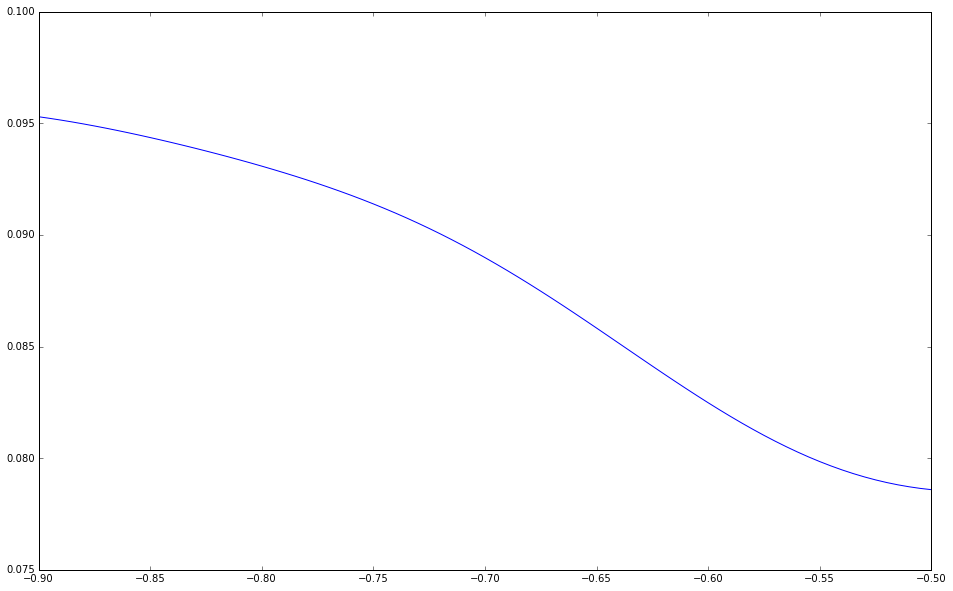

In [6]:
plt.figure(figsize=(16,10))
plt.xlim(-0.9, -0.5)
plt.ylim(0.075,0.10)
plt.plot(x,y)

B flesso: 0.085149 T
X flesso: -0.64 m


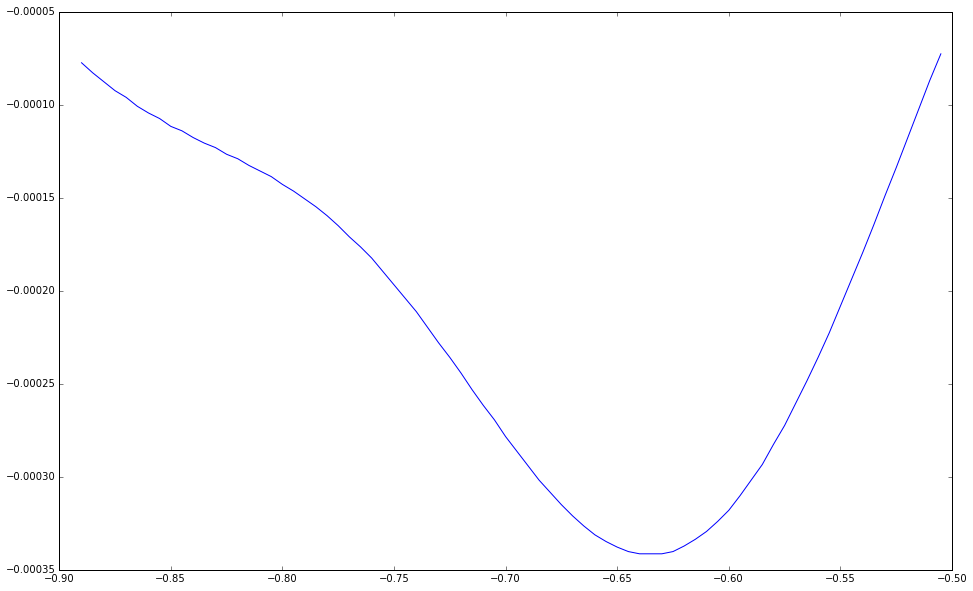

In [7]:
y2 = []
x2 = []

#Scorriamo tutti i punti
for point in x:
    if point > -0.9 and point < -0.5: #Selezioniamo solo quelli nel range che a noi interessa
        ind = x.index(point) #salviamo l'indice dell'array
        #Costruiamo due nuovi array comprendenti i valori della zona del flesso
        x2.append(point)
        y2.append(y[ind])

#differenziamo ogni punto con il suo successivo e costruiamo un array     
diffy = numpy.diff(y2)
plt.figure(figsize=(16,10))
plt.plot(x2[1:],diffy)
#cerchiamo l'indice dell'array corrispondente al punto di flesso
index_flesso = numpy.where(diffy == min(diffy))[0].tolist()[0]
B_flesso = y2[index_flesso]
x_flesso = x2[index_flesso]
print('B flesso:', B_flesso, 'T')
print('X flesso:', x_flesso, 'm')

Chiamiamo con `x_range` i valori di x nella zona che a noi interessa e `y_range` i valori del campo in quella zona

X minimo:  -0.74 m
X massimo:  -0.54 m
B minimo:  0.0795 T
B massimo:  0.091 T


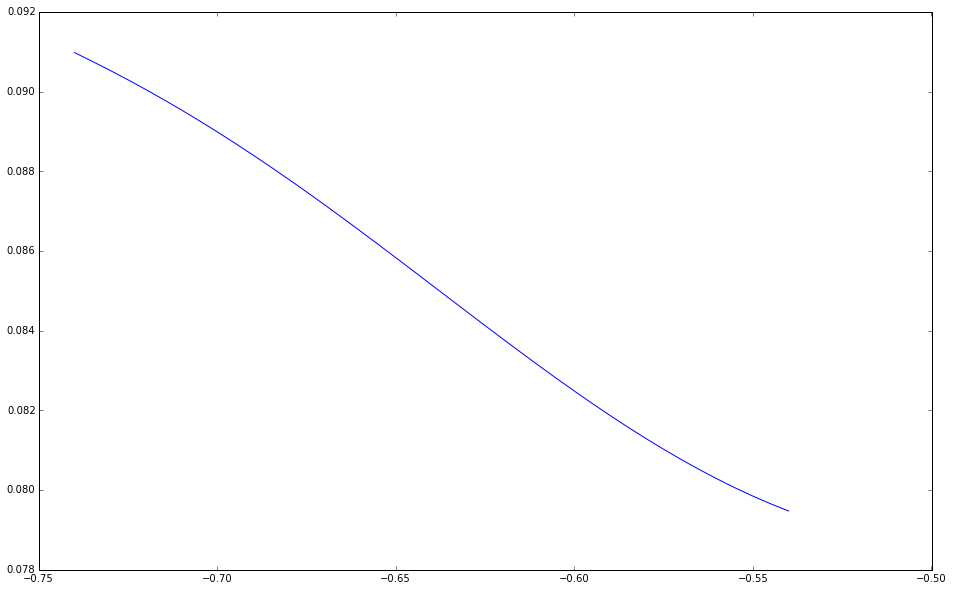

In [8]:
y_range = []
x_range = []

for xx in x:
    #cerchiamo i valori da cui inizia e finisce la nostra ipotetica sonda
    if xx >= (x_flesso -0.1) and xx <= (x_flesso +0.1):
        y_range.append(y[x.index(xx)])
        x_range.append(xx)
        
plt.figure(figsize=(16,10))
plt.plot(x_range, y_range)
x_min = min(x_range)
x_max = max(x_range)
B_min = min(y_range)
B_max = max(y_range)
print('X minimo: ', x_min, 'm')
print('X massimo: ', x_max, 'm')
print('B minimo: ', round(B_min,4), 'T')
print('B massimo: ', round(B_max,4), 'T')


## Calcolo del raggio di Larmor

Abbiamo calcolato il raggio di Larmor per elettroni $r_e$ e per gli ioni $r_i$ nel caso dell'idrogeno $H_2$ utilizzando:
$$
    r_{Larmor}[cm] = \frac{mv}{Z|e|B}
$$
$$
    r_e = 2.38\; \frac{\sqrt{T_e[eV]}}{B[Gauss]} \qquad r_i = 1.02\;10^2 \frac{\sqrt{T_i[eV]}}{B[Gauss]}
$$

Indichiamo con `r_e` il raggio di Larmor elettronico e stimiamo il raggio minimo e massimo che le particelle possono assumere

In [9]:
r_e_min = 2.38 * sqrt(t_e)/(B_max * 10**4)
r_e_max = 2.38 * sqrt(t_e)/(B_min * 10**4)
r_e_flesso = 2.38 * sqrt(t_e)/(B_flesso * 10**4)

print("Raggio di Larmour minimo: {0} cm".format(round(r_e_min,4)))
print("Raggio di Larmour massimo: {0} cm".format(round(r_e_max,4)))
print("Raggio di Larmour minimo: {0} cm".format(round(r_e_flesso,4)))

Raggio di Larmour minimo: 0.0058 cm
Raggio di Larmour massimo: 0.0067 cm
Raggio di Larmour minimo: 0.0063 cm


Abbiamo visto che il raggio di Larmor elettronico è minore della $\lambda_D$. Approssimativamente ci viene un raggio di Larmour massimo di $ 6\;10^{-3} cm $ rispetto a $ 0.0166 cm $ della guaina di Debye. Ciò signfica che dovremo tenere conto dell'area efficace di raccolta

# Stima di $x_g$

### Dimensionamento della sonda


### Considerazioni

I parametri liberi sono:
* Altezza della sonda
* Raggio della sonda
* Resitenza del circuito
* $V_{alimentazione} = V_{bias}$

Parametri fissi:
* Zona di campo di lavoro: $794-909G$
* Densità di corrente di saturazione elettronica:

    $$J_i = 14.8 \; A/m^2$$
    $$J_e = 599.0 \; A/m^2 $$
    


## Stima delle correnti di saturazione

Per stimare le correnti di saturazione ionica ed elettronica è stato eseguito il seguente approccio: si è stimata una densità media con i parametri di gym forniti:
* $T=5ev$
* $n=10^{16}\frac{particelle}{m^3}$

in seguito sono state ipotizzate piccole variazioni $\delta n$ e $\delta T$ dei parametri dati e, tramite uno sviluppo di Taylor, è stato calcolato un range delle densità di saturazione.



Le densità di corrente di saturazione ionica ed elettronica sono date, rispettivamente, dalle formule:
$$
    J_{sat.i}= \frac{en}{2} \sqrt{\frac{T_{el}}{m_i}} \qquad
    J_{sat.el}=\frac{en}{4} \sqrt{\frac{8T_{el}}{\pi m_{el}}}
$$
In S.I.
$$
    J_{sat.i}[A/m^2]= \frac{enc}{2} \sqrt{\frac{T_{el}[eV]}{m_i[eV]}} \qquad
    J_{sat.el}[A/m^2]=\frac{enc}{4} \sqrt{\frac{8T_{el}[eV]}{\pi m_{el}[eV]}}
$$

Gli ioni sono nuclei di $H_2$, è stata utilizzata nel conto una massa ionica di $1876MeV$, sono stati ottenuti i valori:

In [10]:
j_sat_i = 0.5 * (n_e * 10**6) * c * q * sqrt(t_e/(m_ioni))
print('Jsat_ionica: {0} (A/m^2)'.format(round(j_sat_i,4)))
j_sat_e =  1/4 * (n_e* 10**6) *  c * q * sqrt(5*8/(math.pi*m_elettroni))
print('Jsat_elettronica: {0} (A/m^2)'.format(round(j_sat_e,2)))


Jsat_ionica: 12.3902 (A/m^2)
Jsat_elettronica: 599.0 (A/m^2)




* $J_{sat.i}=1.239\frac{mA}{cm^2}$
* $J_{sat.el}=59.900\frac{mA}{cm^2}$ 

Si è proceduto poi a valutare l'effetto di variazioni (scelte arbitrariamente):

* $\delta n = 0.1 \cdot 10^{16} \frac{1}{m^3}$
* $\delta T = 0.2 eV$

Ottenendo i seguenti range per le densità di corrente:

* $J_{sat.i}$ from $1.091\frac{mA}{cm^2}$ to $1.387\frac{mA}{cm^2}$
* $J_{sat.el}$ from $52.712\frac{mA}{cm^2}$ to $67.088\frac{mA}{cm^2}$

La maggior parte del lavoro sarà svolto nelle regioni prossime a quelle di corrente di saturazione elettronica, possiamo valutare i rapport:
$$
\frac{J_{el_{max}}}{J_{el}} = \frac{67.088}{59.900}=1.12 \\
\frac{J_{el_{min}}}{J_{el}} = \frac{52.712}{59.900}=0.88
$$

Dimensionando la sonda per una corrente di saturazione di 7mA (scelta arbitrariamente guardando il grafico) utilizzando le stime originarie, alla peggio la corrente sarà amplificata o ridotta di un fattore pari a quelli calcolati sopra, avremo dunque: se voglio una corrente in uscita di 7 mA e dimensioniamo la sonda per quella corrente, restiamo comunque nello stesso ordine di grandezza, quindi possiamo un po' fottercene, questo è il senso. Voglio dire, la stima della corrente di saturazione non è intaccata in modo eccessivo da eventuali variazioni di densità o temperatura. 

* $I_{Max}=7.84mA$
* $I_{min}=6.16mA$

l'ordine di grandezza resta invariato. Possiamo quindi procedere a stimare le dimensioni della sonda utilizzando come parametro le densità di corrente:

* $J_{sat.i}=1.239\frac{mA}{cm^2}$
* $J_{sat.el}=59.900\frac{mA}{cm^2}$ 



In [11]:
x_g = lambda_D * (1/t_e)**(3/4) * V_probe_max**(3/4)
print("x_g: {0} cm".format(round(x_g,5)))

x_g: 0.0279 cm


In [15]:
I = 10*10**-3 #ampere
diam = 1.5*10**-3 #metri
fatt_espan = 1 +(2*x_g)/(diam*10**2)
print("Fattore di espansione: {0}".format(round(fatt_espan,4)))
A = I/(j_sat_e*fatt_espan)
h = A/diam
print('H sonda: {} mm'.format(round(h*10**3,3)))

Fattore di espansione: 1.372
H sonda: 8.112 mm


In [16]:
h = 0.008 #scelto
A_eff = h*diam*fatt_espan
I_max = A_eff*j_sat_e
print('Area efficace: {} mm^2'.format(round(A_eff*10**6,3)))
print('Corrente massima con questi dati: {} mA'.format(round(I_max*10**3, 3)))

Area efficace: 16.465 mm^2
Corrente massima con questi dati: 9.862 mA


In [17]:
v_r_max = 5
R = v_r_max / I_max
print('Resistenza: {} Ohm'.format(round(R,4)))

Resistenza: 506.9829 Ohm
